In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import h5py
import numpy as np

import powerbox as pbox
import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
! ls /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/decay/phot/Mass3/

ls: cannot access '/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/decay/phot/Mass3/': No such file or directory


In [3]:
outputs_dir = "/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs"

# mass_i = 0
# masses = np.logspace(1.5, 12, 22)
# log_lifetimes = np.array([
#     29.393, 29.202, 29.012, 28.821, 28.631, 28.440, 28.250, 28.059, 27.868, 27.678, 27.487,
#     27.297, 27.106, 26.916, 26.725, 26.535, 26.344, 26.153, 25.963, 25.772, 25.582, 25.391
# ])
# mass = masses[mass_i]
# log_lifetime = log_lifetimes[mass_i]
# print(mass)
# print(log_lifetime)

bkg_fn = f"{outputs_dir}/bkg/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"
fid_fn = f"{outputs_dir}/decay/phot/Mass3/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_2_r54321.h5"
hom_fn = f"{outputs_dir}/decay/phot_hom/Mass3/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_2_r54321.h5"

# Quick plot

In [13]:
bkg_fn = f"{outputs_dir}/bkg/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"
with h5py.File(bkg_fn, 'r') as hf:
    lcfield_bkg = hf['lightcones']['density'][()]
    print(hf['lightcones'].keys())

lc_bkg = p21c.LightCone.read(bkg_fn)
z_s = lc_bkg.lightcone_redshifts

<KeysViewHDF5 ['Tk_box', 'Ts_box', 'brightness_temp', 'density', 'xH_box', 'x_e_box']>


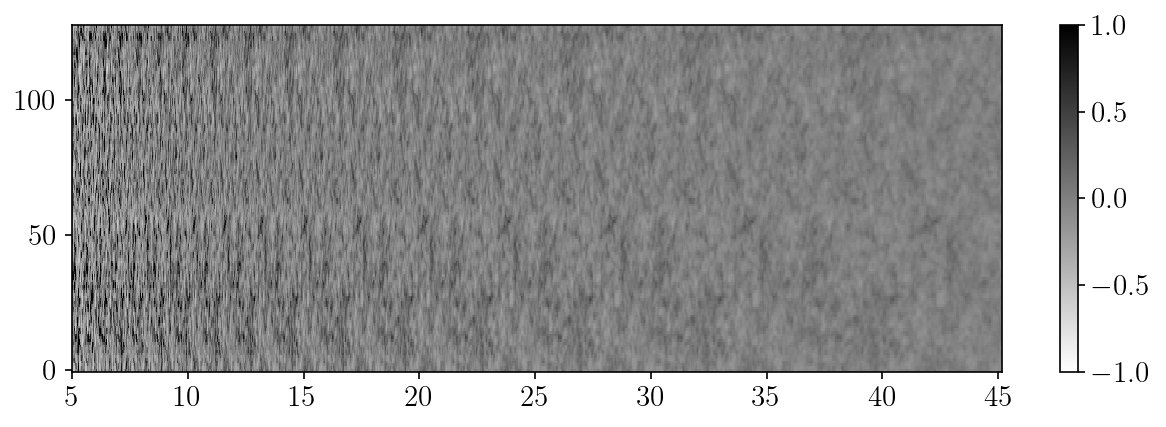

In [20]:
fig, ax = plt.subplots(figsize=(10, 3))
im = ax.pcolormesh(z_s, np.arange(128), lcfield_bkg[:, 0, :], cmap='binary', vmax=1, vmin=-1)
fig.colorbar(im)

# $T_{21}$

In [ ]:
with h5py.File(bkg_fn, 'r') as hf:
    lcfield_bkg = hf['lightcones']['brightness_temp'][()]
with h5py.File(fid_fn, 'r') as hf:
    lcfield_fid = hf['lightcones']['brightness_temp'][()]
with h5py.File(hom_fn, 'r') as hf:
    lcfield_hom = hf['lightcones']['brightness_temp'][()]
lc_bkg = p21c.LightCone.read(bkg_fn)
z_s = lc_bkg.lightcone_redshifts

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist((lcfield_bkg[:,0,:]).flatten(), bins=100);
axs[1].hist((lcfield_fid[:,0,:]-lcfield_bkg[:,0,:]).flatten(), bins=100);
axs[2].hist((lcfield_hom[:,0,:]-lcfield_bkg[:,0,:]).flatten(), bins=100);

In [5]:
EoR_color = mpl.colors.LinearSegmentedColormap.from_list('EoR', [
    (0.0,  'yellow'),
    (0.25, 'orange'),
    (0.5,  'red'),
    (0.75, 'black'),
    (0.85, 'blue'),
    (0.95, 'cyan'),
    (1.0,  'cyan')
])
vmin, vmax = -60, 20 # 0 at 0.75
EoR_color_small = mpl.colors.LinearSegmentedColormap.from_list('EoRsmall', [
    (0.0, 'black'),
    (0.6, 'blue'),
    (1.0, 'cyan')
])

## vertical

/tmp/ipykernel_3351234/2718539805.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.05, hspace=0.05)


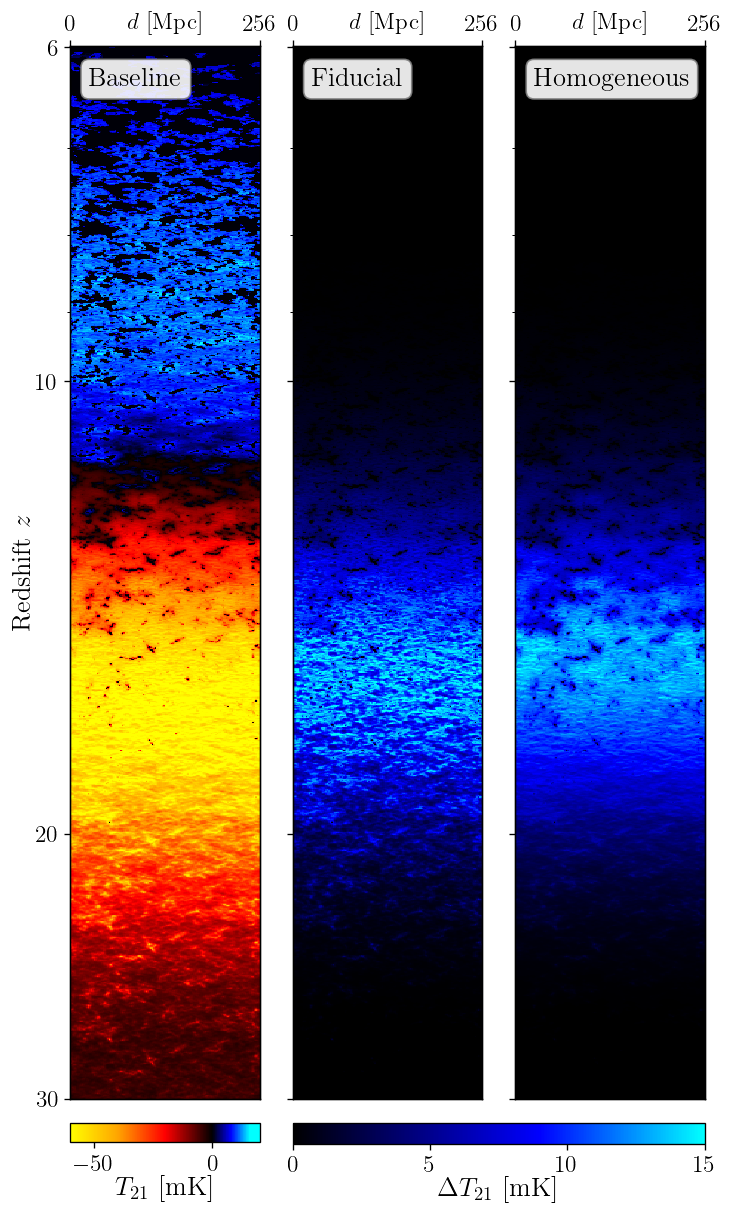

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(6, 10), sharey='row', layout='constrained')

x_s = np.linspace(0, 256, 128)
z_start = 6.
z_end = 30.
i_z_start = np.argmin(np.abs(z_s-z_start)) - 1
i_z_end = np.argmin(np.abs(z_s-z_end)) + 1
z_s_plot = z_s[i_z_start:i_z_end]
lcplot_bkg = lcfield_bkg[:,0,i_z_start:i_z_end].T
lcplot_fid = lcfield_fid[:,0,i_z_start:i_z_end].T
lcplot_hom = lcfield_hom[:,0,i_z_start:i_z_end].T

ax = axs[0]
im = ax.pcolormesh(x_s, z_s_plot, lcplot_bkg, cmap=EoR_color, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax, aspect=10, pad=0.01, orientation='horizontal')
cbar.ax.set_xlabel(r'$T_{21}$ [mK]', labelpad=0, fontsize=16)

ax = axs[1]
im = ax.pcolormesh(x_s, z_s_plot, (lcplot_fid - lcplot_bkg), cmap=EoR_color_small, vmin=0, vmax=15)

ax = axs[2]
im = ax.pcolormesh(x_s, z_s_plot, (lcplot_hom - lcplot_bkg), cmap=EoR_color_small, vmin=0, vmax=15)
cbar = fig.colorbar(im, ax=axs[1:], aspect=20, pad=0.01, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Delta T_{21}$ [mK]', labelpad=0, fontsize=16)

for ax in axs:
    ax.set(yscale='log', xticks=[])
    axt = ax.twiny()
    axt.set_xticks([0, 256])
    axt.set_xlabel(r'$d$ [Mpc]', labelpad=-9)
    ax.invert_yaxis()

# axs[0].set_title(r'No injection $T_b$ [mK]')
# axs[1].set_title(r'Inhom. injection $T_b-$ No injection $T_b$ [mK]')
# axs[2].set_title(r'Hom. injection $T_b-$ No injection $T_b$ [mK]')

axs[0].set_ylabel('Redshift $z$', labelpad=0, fontsize=16)
axs[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
axs[0].set_yticks([6, 10, 20, 30])
axs[0].set_yticklabels([6, 10, 20, 30])

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

axs[0].text(0.1, 0.98, 'Baseline', fontsize=16,
            transform=axs[0].transAxes, ha='left', va='top', bbox=bbox_props)
axs[1].text(0.1, 0.98, 'Fiducial', fontsize=16,
            transform=axs[1].transAxes, ha='left', va='top', bbox=bbox_props)
axs[2].text(0.1, 0.98, 'Homogeneous', fontsize=16,
            transform=axs[2].transAxes, ha='left', va='top', bbox=bbox_props)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.savefig("lightconeexample_delta.png", dpi=300)

In [15]:
with h5py.File(bkg_fn, 'r') as hf:
    lcfield_bkg = hf['lightcones']['Tk_box'][()]
with h5py.File(fid_fn, 'r') as hf:
    lcfield_fid = hf['lightcones']['Tk_box'][()]
with h5py.File(hom_fn, 'r') as hf:
    lcfield_hom = hf['lightcones']['Tk_box'][()]
lc_bkg = p21c.LightCone.read(bkg_fn)
z_s = lc_bkg.lightcone_redshifts

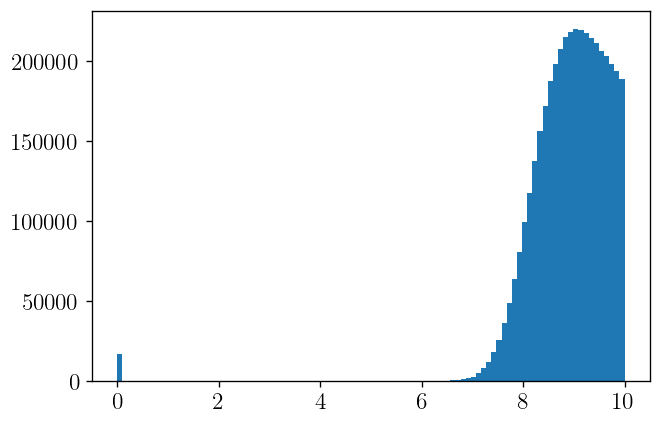

In [20]:
plt.hist(lcfield_bkg.flatten(), bins=np.linspace(0, 10, 100));

/tmp/ipykernel_3351234/3566553867.py:50: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.05, hspace=0.05)


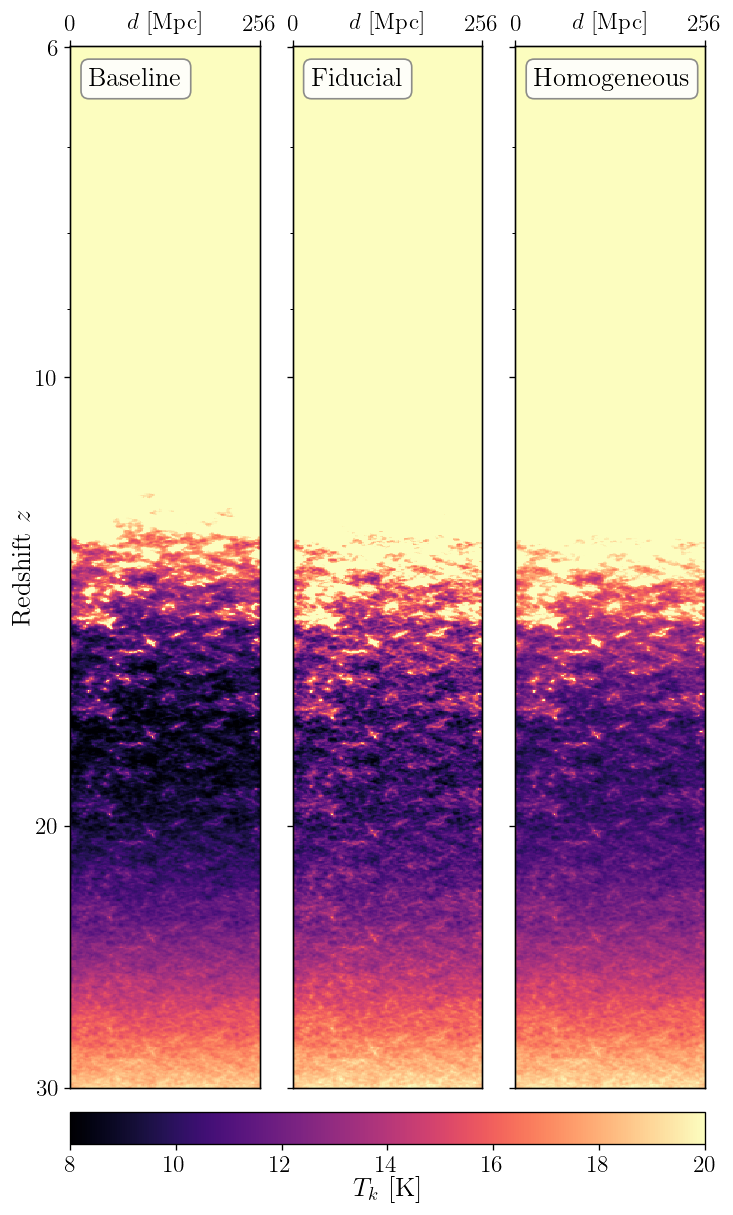

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(6, 10), sharey='row', layout='constrained')

x_s = np.linspace(0, 256, 128)
z_start = 6.
z_end = 30.
i_z_start = np.argmin(np.abs(z_s-z_start)) - 1
i_z_end = np.argmin(np.abs(z_s-z_end)) + 1
z_s_plot = z_s[i_z_start:i_z_end]
lcplot_bkg = lcfield_bkg[:,0,i_z_start:i_z_end].T
lcplot_fid = lcfield_fid[:,0,i_z_start:i_z_end].T
lcplot_hom = lcfield_hom[:,0,i_z_start:i_z_end].T
vmin, vmax = 8, 20

ax = axs[0]
im = ax.pcolormesh(x_s, z_s_plot, lcplot_bkg, cmap='magma', vmin=vmin, vmax=vmax)

ax = axs[1]
im = ax.pcolormesh(x_s, z_s_plot, (lcplot_fid), cmap='magma', vmin=vmin, vmax=vmax)

ax = axs[2]
im = ax.pcolormesh(x_s, z_s_plot, (lcplot_hom), cmap='magma', vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=axs, aspect=20, pad=0.01, orientation='horizontal')
cbar.ax.set_xlabel(r'$T_k$ [K]', labelpad=0, fontsize=16)

for ax in axs:
    ax.set(yscale='log', xticks=[])
    axt = ax.twiny()
    axt.set_xticks([0, 256])
    axt.set_xlabel(r'$d$ [Mpc]', labelpad=-9)
    ax.invert_yaxis()

# axs[0].set_title(r'No injection $T_b$ [mK]')
# axs[1].set_title(r'Inhom. injection $T_b-$ No injection $T_b$ [mK]')
# axs[2].set_title(r'Hom. injection $T_b-$ No injection $T_b$ [mK]')

axs[0].set_ylabel('Redshift $z$', labelpad=0, fontsize=16)
axs[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
axs[0].set_yticks([6, 10, 20, 30])
axs[0].set_yticklabels([6, 10, 20, 30])

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

axs[0].text(0.1, 0.98, 'Baseline', fontsize=16,
            transform=axs[0].transAxes, ha='left', va='top', bbox=bbox_props)
axs[1].text(0.1, 0.98, 'Fiducial', fontsize=16,
            transform=axs[1].transAxes, ha='left', va='top', bbox=bbox_props)
axs[2].text(0.1, 0.98, 'Homogeneous', fontsize=16,
            transform=axs[2].transAxes, ha='left', va='top', bbox=bbox_props)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.savefig("lightconeexample_delta.png", dpi=300)

## horizontal

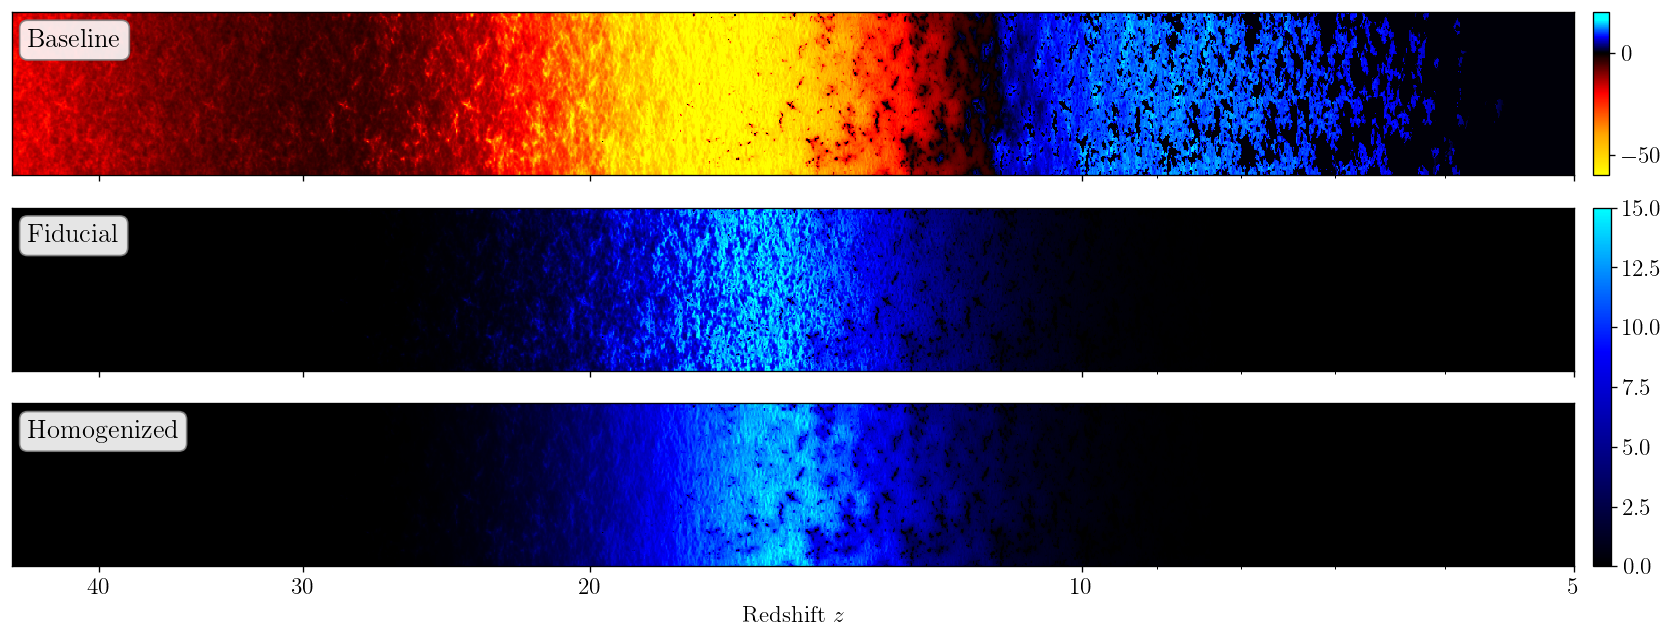

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(20, 6), sharex='col')

ax = axs[0]
im = ax.pcolormesh(z_s, np.arange(128), lcfield_bkg[:,0,:], cmap=EoR_color, vmin=vmin, vmax=vmax)
ax.set(xscale='log')
cbar = fig.colorbar(im, ax=ax, aspect=10, pad=0.01)
#cbar.ax.set_ylabel(r'$T_{21}$ [mK]', labelpad=0, fontsize=16)

ax = axs[1]
im = ax.pcolormesh(z_s, np.arange(128), lcfield_fid[:,0,:]-lcfield_bkg[:,0,:], cmap=EoR_color_small, vmin=0, vmax=15)
ax.set(xscale='log')

ax = axs[2]
im = ax.pcolormesh(z_s, np.arange(128), lcfield_hom[:,0,:]-lcfield_bkg[:,0,:], cmap=EoR_color_small, vmin=0, vmax=15)
ax.set(xscale='log')
cbar = fig.colorbar(im, ax=axs[1:], aspect=20, pad=0.01)
#cbar.ax.set_ylabel(r'$\Delta T_{21}$ [mK]', labelpad=0, fontsize=16)

# axs[0].set_title(r'No injection $T_b$ [mK]')
# axs[1].set_title(r'Inhom. injection $T_b-$ No injection $T_b$ [mK]')
# axs[2].set_title(r'Hom. injection $T_b-$ No injection $T_b$ [mK]')
axs[0].text(0.01, 0.9, 'Baseline', fontsize=16,
            transform=axs[0].transAxes, ha='left', va='top', bbox=bbox_props)
axs[1].text(0.01, 0.9, 'Fiducial', fontsize=16,
            transform=axs[1].transAxes, ha='left', va='top', bbox=bbox_props)
axs[2].text(0.01, 0.9, 'Homogenized', fontsize=16,
            transform=axs[2].transAxes, ha='left', va='top', bbox=bbox_props)

[ax.set_yticks([]) for ax in axs]

axs[2].invert_xaxis()
axs[2].set_xlabel('Redshift $z$')
axs[2].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
axs[2].set_xticks([5, 10, 20, 30, 40])
axs[2].set_xticklabels([5, 10, 20, 30, 40]);